In [3]:
%%sh
pip install matplotlib networkx


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 1.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 1.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 4.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.6/242.6 kB 5.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 4.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 3.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 2.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 2.8 MB/s eta 0:00:00


In [96]:
# Importamos las librerías para trabajar con BFS(Breadth-First Search)
# Búsqueda en amplitud

import heapq
import networkx as nx
import matplotlib.pyplot as plt


In [97]:
def dfs(grafo, inicio: str, objetivo: str, primer_y_ultimo_i: list[int], n_iteracion: list[int], visitados=None, camino=None, caminos_encontrados=None, n_profundidad: int=0, imprimir=False) -> list:
    n_profundidad += 1
    n_iteracion[0] += 1
    if imprimir:
        print("\nNivel de profundidad:", n_profundidad)
        print("Número de iteración:", n_iteracion)
        print("Primer visitado y último visitado en iteraciones: ", primer_y_ultimo_i)
    
    # Si entramos a este método por primera vez
    if visitados is None:
        visitados = set()
    if camino is None:
        camino = []
    if caminos_encontrados is None:
        caminos_encontrados = []

    camino.append(inicio)
    visitados.add(inicio)

    if imprimir:
        print("Nodo actual:", inicio)
    if imprimir:
        print("Nodos visitados", visitados)
    if imprimir:
        print("Camino Actual:", camino)

    if inicio == objetivo:
        if imprimir:
            print("Camino encontrado:", ' -> '.join(camino))
        if len(caminos_encontrados) == 0:
            primer_y_ultimo_i[0] = n_iteracion[0]
        else:
            primer_y_ultimo_i[1] = n_iteracion[0]
           
        caminos_encontrados.append(camino.copy())
    else:
        for vecino in grafo[inicio]:
            if vecino not in visitados:
                dfs(grafo, vecino, objetivo, primer_y_ultimo_i, visitados=visitados, camino=camino, caminos_encontrados=caminos_encontrados, n_profundidad=n_profundidad, n_iteracion=n_iteracion, imprimir=imprimir)

    camino.pop()  # Eliminamos el último nodo para retroceder al nodo anterior
    visitados.remove(inicio)

    tot_iteraciones = n_iteracion[0]
    return tot_iteraciones, caminos_encontrados


In [98]:
def bfs(grafo, inicio, objetivo, imprimir=False) -> tuple[int, int, list]:
    resultados = []
    # El método set crea un conjunto de datos SIMILAR a una lista pero que
    # NO puede tener elementos duplicados
    visitados = set()
    # (Doubly Ended Queue) Es un tio de lista que permite agregar y eliminar
    # elementos ya sea a la izquiera o a la derecha de la misma
    cola = deque([(inicio, [inicio])])

    i_primer_camino = None
    i_ultimo_camino = None

    i = 1
    while cola:
        # Aquí removemos el primer elemento del set (El de la izquierda)
        # y este será nuestro nodo actual, el resto, el camino (Path restante)
        nodo_actual, camino = cola.popleft()
        if imprimir:
            print("\nIteración:", i)
            print("Nodo actual:", nodo_actual)
        
        if nodo_actual == objetivo:
            if imprimir:
                print("Camino encontrado:", "->".join(camino))
            if len(resultados) == 0:
                i_primer_camino = i
            else:
                i_ultimo_camino = i
            resultados.append(camino)
        if nodo_actual not in visitados:
            visitados.add(nodo_actual)
            if imprimir:
                print("Nodos visitados", visitados)
            for vecino in grafo[nodo_actual]:
                if vecino not in visitados:
        
                    nueva_ruta = camino + [vecino]
                    if imprimir:
                        print("Nueva ruta:", nueva_ruta)
                    cola.append((vecino, nueva_ruta))
        i += 1
    # print("No se encontró un camino al nodo objetivo.")
    return (i, i_primer_camino, i_ultimo_camino, resultados)

In [ ]:
# Algoritmo de costo uniforme
def costo_uniforme(inicio, objetivo, grafo):
    cola_prioridad = []
    heapq.heappush(cola_prioridad, (0, inicio, [inicio]))  
    # Un heap es una estructura de datos 
    # basada en un árbol binario
    # heapq.heappush(heap, item): 
    # Agrega un nuevo elemento al montón.
    visitados = set()
    
    while cola_prioridad:
        costo_actual, nodo_actual, camino = heapq.heappop(cola_prioridad)
        # heapq.heappop(heap):
        # Elimina y devuelve el
        # elemento más pequeño del montón.
        print("--------------------")
        print("Nodos visitados", visitados)
        print("Nodo Actual:", nodo_actual)
        print("Costo Actual:", costo_actual)
        print("Camino:", camino)
        
        if nodo_actual == objetivo:
            return costo_actual, camino
        
        if nodo_actual not in visitados:
            visitados.add(nodo_actual)
            for vecino, costo in grafo[nodo_actual].items():
                if vecino not in visitados: # Visitamos solo los vecinos NO visitados
                    nuevo_costo = costo_actual + costo
                    nuevo_camino = camino + [vecino]
                    heapq.heappush(cola_prioridad, (nuevo_costo, vecino, nuevo_camino))
            print("Cola:", cola_prioridad)

    return float('inf'), []

In [17]:
def printCaminos(caminos: list[str]) -> None:
    for i, camino in enumerate(caminos):
        print(f"{i+1}:".rjust(3), ' -> '.join(camino))

def plotGrafo(grafo, caminos_encontrados, label: str, nodo_inicio: str, nodo_objetivo: str) -> None:
    G = nx.Graph(grafo)

    for nodo, vecinos in grafo.items():
        for vecino, peso in vecinos.items():
            G.add_edge(nodo, vecino, weight=peso)    

    # Coloreamos los nodos según si están en algún camino o no
    colores = []
    for nodo in G.nodes():
        en_camino = False
        for camino in caminos_encontrados:
            if nodo in camino:
                en_camino = True
                break
        if (nodo == nodo_inicio) or (nodo == nodo_objetivo):
            colores.append("orange")
        elif en_camino:
            colores.append('green')
        else:
            colores.append('cyan')

    # Dibujar el grafo
    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_size=700, node_color=colors, font_size=12, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title(label)
    plt.show()


def busqueda(grafo, nodo_inicio: str, nodo_objetivo: str, imprimir=False):
    # Para un dado grafo con nodo de inicio y fin, se ejecutan
    # múltiples algoritmos de búsqueda
    def mostrar_caminos_encontrados(caminos, tot_iteraciones, i_primer_camino, i_ultimo_camino) -> list[str]:
        # Código común entre algoritmos de búsqueda para mostrar resultados
        caminos_cortos = None
        min_len = None

        print(f"Total de iteraciones: {tot_iteraciones}")
        print(f"Primer camino encontrado en iteración: {i_primer_camino}")
        print(f"Último camino encontrado en iteración: {i_ultimo_camino}")
        
        if caminos:
            # si el algoritmo sí encontró caminos
            print(f"Todos los caminos encontrados ({len(caminos)}):")
            printCaminos(caminos)

            # De los caminos encontrados, mostrar el/los más cortos
            min_len: int = min(len(c) for c in caminos)
            caminos_cortos = [c for c in caminos if len(c) == min_len]
            print(f"Caminos MÁS CORTOS encontrados ({len(caminos_cortos)}), len={min_len}:")
            printCaminos(caminos_cortos)
        else:
            print("No se encontró un camino al nodo objetivo.")
        print()

        # se regresan los caminos para comparar con otros algoritmos e imprimir el más corto
        return (min_len, caminos_cortos)
        
    print(f"NODO DE INICIO: {nodo_inicio}\nNODO OBJETIVO: {nodo_objetivo}\n")
    
    ############################################################
    # DFS
    ############################################################
    print("Recorrido DFS:")
    primer_y_ultimo_i = [None, None]
    tot_iteraciones, caminos_encontrados = dfs(grafo, nodo_inicio, nodo_objetivo, primer_y_ultimo_i, n_iteracion=[0], imprimir=imprimir)
    i_primer_camino, i_ultimo_camino = primer_y_ultimo_i 
    min_len_dfs, caminos_min_dfs = mostrar_caminos_encontrados(caminos_encontrados, tot_iteraciones, i_primer_camino, i_ultimo_camino)
        
    ############################################################
    # BFS
    ############################################################
    print("Recorrido BFS:")
    tot_iteraciones, i_primer_camino, i_ultimo_camino, caminos_encontrados = bfs(grafo, nodo_inicio, nodo_objetivo, imprimir=imprimir)
    min_len_bfs, caminos_min_bfs = mostrar_caminos_encontrados(caminos_encontrados, tot_iteraciones, i_primer_camino, i_ultimo_camino)
    
    ############################################################
    # Creación de gráfico
    ############################################################
    min_len = None
    match (min_len_dfs, min_len_bfs):
        case (None, None):
            print("\nNo se encontraon caminos")
            label_grafo = None
            camino_final_plot = []
        case (dfs_res, None):
            min_len = dfs_res
            camino_final_plot = [caminos_min_dfs[0]]
            label_grafo = "Profunidad"
        case (None, bfs_res):
            min_len = bfs_res
            label_grafo = "Amplitud"
            camino_final_plot = [caminos_min_bfs[0]]
        case (dfs_res, bfs_res):
            if dfs_res < bfs_res:
                min_len = dfs_res
                camino_final_plot = [caminos_min_dfs[0]]
                label_grafo = "Profunidad"
            else:
                min_len = bfs_res
                camino_final_plot = [caminos_min_bfs[0]]
                label_grafo = "Amplitud"

    print("Camino más corto final")
    printCaminos(camino_final_plot)
    plotGrafo(grafo, camino_final_plot, f"Búsqueda por {label_grafo} len={min_len}\n{nodo_inicio} -> {nodo_objetivo}", nodo_inicio, nodo_objetivo)


In [13]:
# Tenemos las siguientes ciudades interconectadas:
# Definimos el grafo como un diccionario de listas de adyacencia
grafo = {
    "El Rosario": {"Instituto del Petróleo": 6, "Tacuba": 4},
    "Tacuba": {"El Rosario": 4, "Cuatro Caminos": 2, "Tacubaya": 5, "Hidalgo": 7},
    "Cuatro Caminos": {"Tacuba": 2},
    "Tacubaya": {"Tacuba": 5, "Observatorio": 1, "Mixcoac": 3, "Centro Médico": 3, "Balderas": 6}
    "Observatorio": {"Tacubaya": 1},
    "Mixcoac": {"Barranca del Muerto": 1, "Zapata": 3},
    "Zapata": {"Mixcoac": 3, "Universidad": 5, "Ermita": 3, "Centro Médico": 4},
    "Ermita": {"Zapata": 3, "Tasqueña": 2, "Atlalilco": 2, "Chabacano": 6},
    "Atlalilco": {"Ermita": 2, "Tláhuac": 11: "Const. de 1917": 4, "Santa Anita": 6},
    "Santa Anita": {"Atlalilco": 6, "Jamaica": 1, "Chabacano": 2},
    "Chabacano": {"Santa Anita": 2, "Jamaica": 1, "Pino Suárez": 2, "Salto del Agua": 3, "Centro Médico": 2, "Ermita": 6},
    "Centro Médico": {"Chabacano": 2, "Balderas": 3, "Tacubaya": 3, "Zapata": 4},
    "Balderas": {"Centro Médico": 3, "Tacubaya": 6, "Hidalgo": 2, "Salto del Agua": 1},
    "Salto del Agua": {"Pino Suárez": 2, "Bellas Artes": 2, "Balderas": 1, "Chabacano": 3},
    "Pino Suárez": {"Chabacano": 2, "Candelaria": 2, "Bellas Artes": 3, "Salto del Agua": 2},
    "Bellas Artes": {"Salto del Agua": 2, "Pino Suárez": 3, "Garibaldi/Lagunilla": 1, "Hidalgo": 1},
    "Hidalgo": {"Bellas Artes": 1, "Guerrero": 1, "Tacuba": 7, "Balderas": 2},
    "Guerrero": {"Hidalgo": 1, "Garibaldi/Launilla": 1, "La Raza": 2},
    "La Raza": {"Guerrero": 2, "Consulado": 3, "Deportivo 18 de Marzo": 2, "Instituto del Petróleo": 2},
    "Instituto del Petróleo": {"La Raza": 2, "Deportivo 18 de Marzo": 2, "Politécnico": 1, "El Rosario": 6},
    "Politécnico": {"Instituto del Petróleo": 1},
    "Deportivo 18 de Marzo": {"La Raza": 2, "Martín Carrera": 2, "Indios Verdes": 1, "Instituto del Petróleo": 2},
    "Indios Verdes": {"Deportivo 18 de Marzo": 1},
    "Martín Carrera": {"Deportivo 18 de Marzo": 2, "Consulado": 3},
    
}

plotGrafo(grafo, [], "Grafo", "", "")

NameError: name 'plotGrafo' is not defined

NODO DE INICIO: Campeche
NODO OBJETIVO: CDMX

Recorrido DFS:
Total de iteraciones: 101
Primer camino encontrado en iteración: 16
Último camino encontrado en iteración: 82
Todos los caminos encontrados (4):
 1: Campeche -> Cd del Cármen -> Villahermosa -> Cárdenas -> Minatitlán -> Coatzacoalcos -> Juchitán -> Tehuantepec -> Oaxaca -> Puebla -> CDMX
 2: Campeche -> Cd del Cármen -> Villahermosa -> Cárdenas -> Minatitlán -> Coatzacoalcos -> Veracruz -> Córdoba -> Orizaba -> Puebla -> CDMX
 3: Campeche -> Cd del Cármen -> Villahermosa -> Tuxtla Gutiérrez -> Tonalá -> Juchitán -> Coatzacoalcos -> Veracruz -> Córdoba -> Orizaba -> Puebla -> CDMX
 4: Campeche -> Cd del Cármen -> Villahermosa -> Tuxtla Gutiérrez -> Tonalá -> Juchitán -> Tehuantepec -> Oaxaca -> Puebla -> CDMX
Caminos MÁS CORTOS encontrados (1), len=10:
 1: Campeche -> Cd del Cármen -> Villahermosa -> Tuxtla Gutiérrez -> Tonalá -> Juchitán -> Tehuantepec -> Oaxaca -> Puebla -> CDMX

Recorrido BFS:
Total de iteraciones: 37
Prime

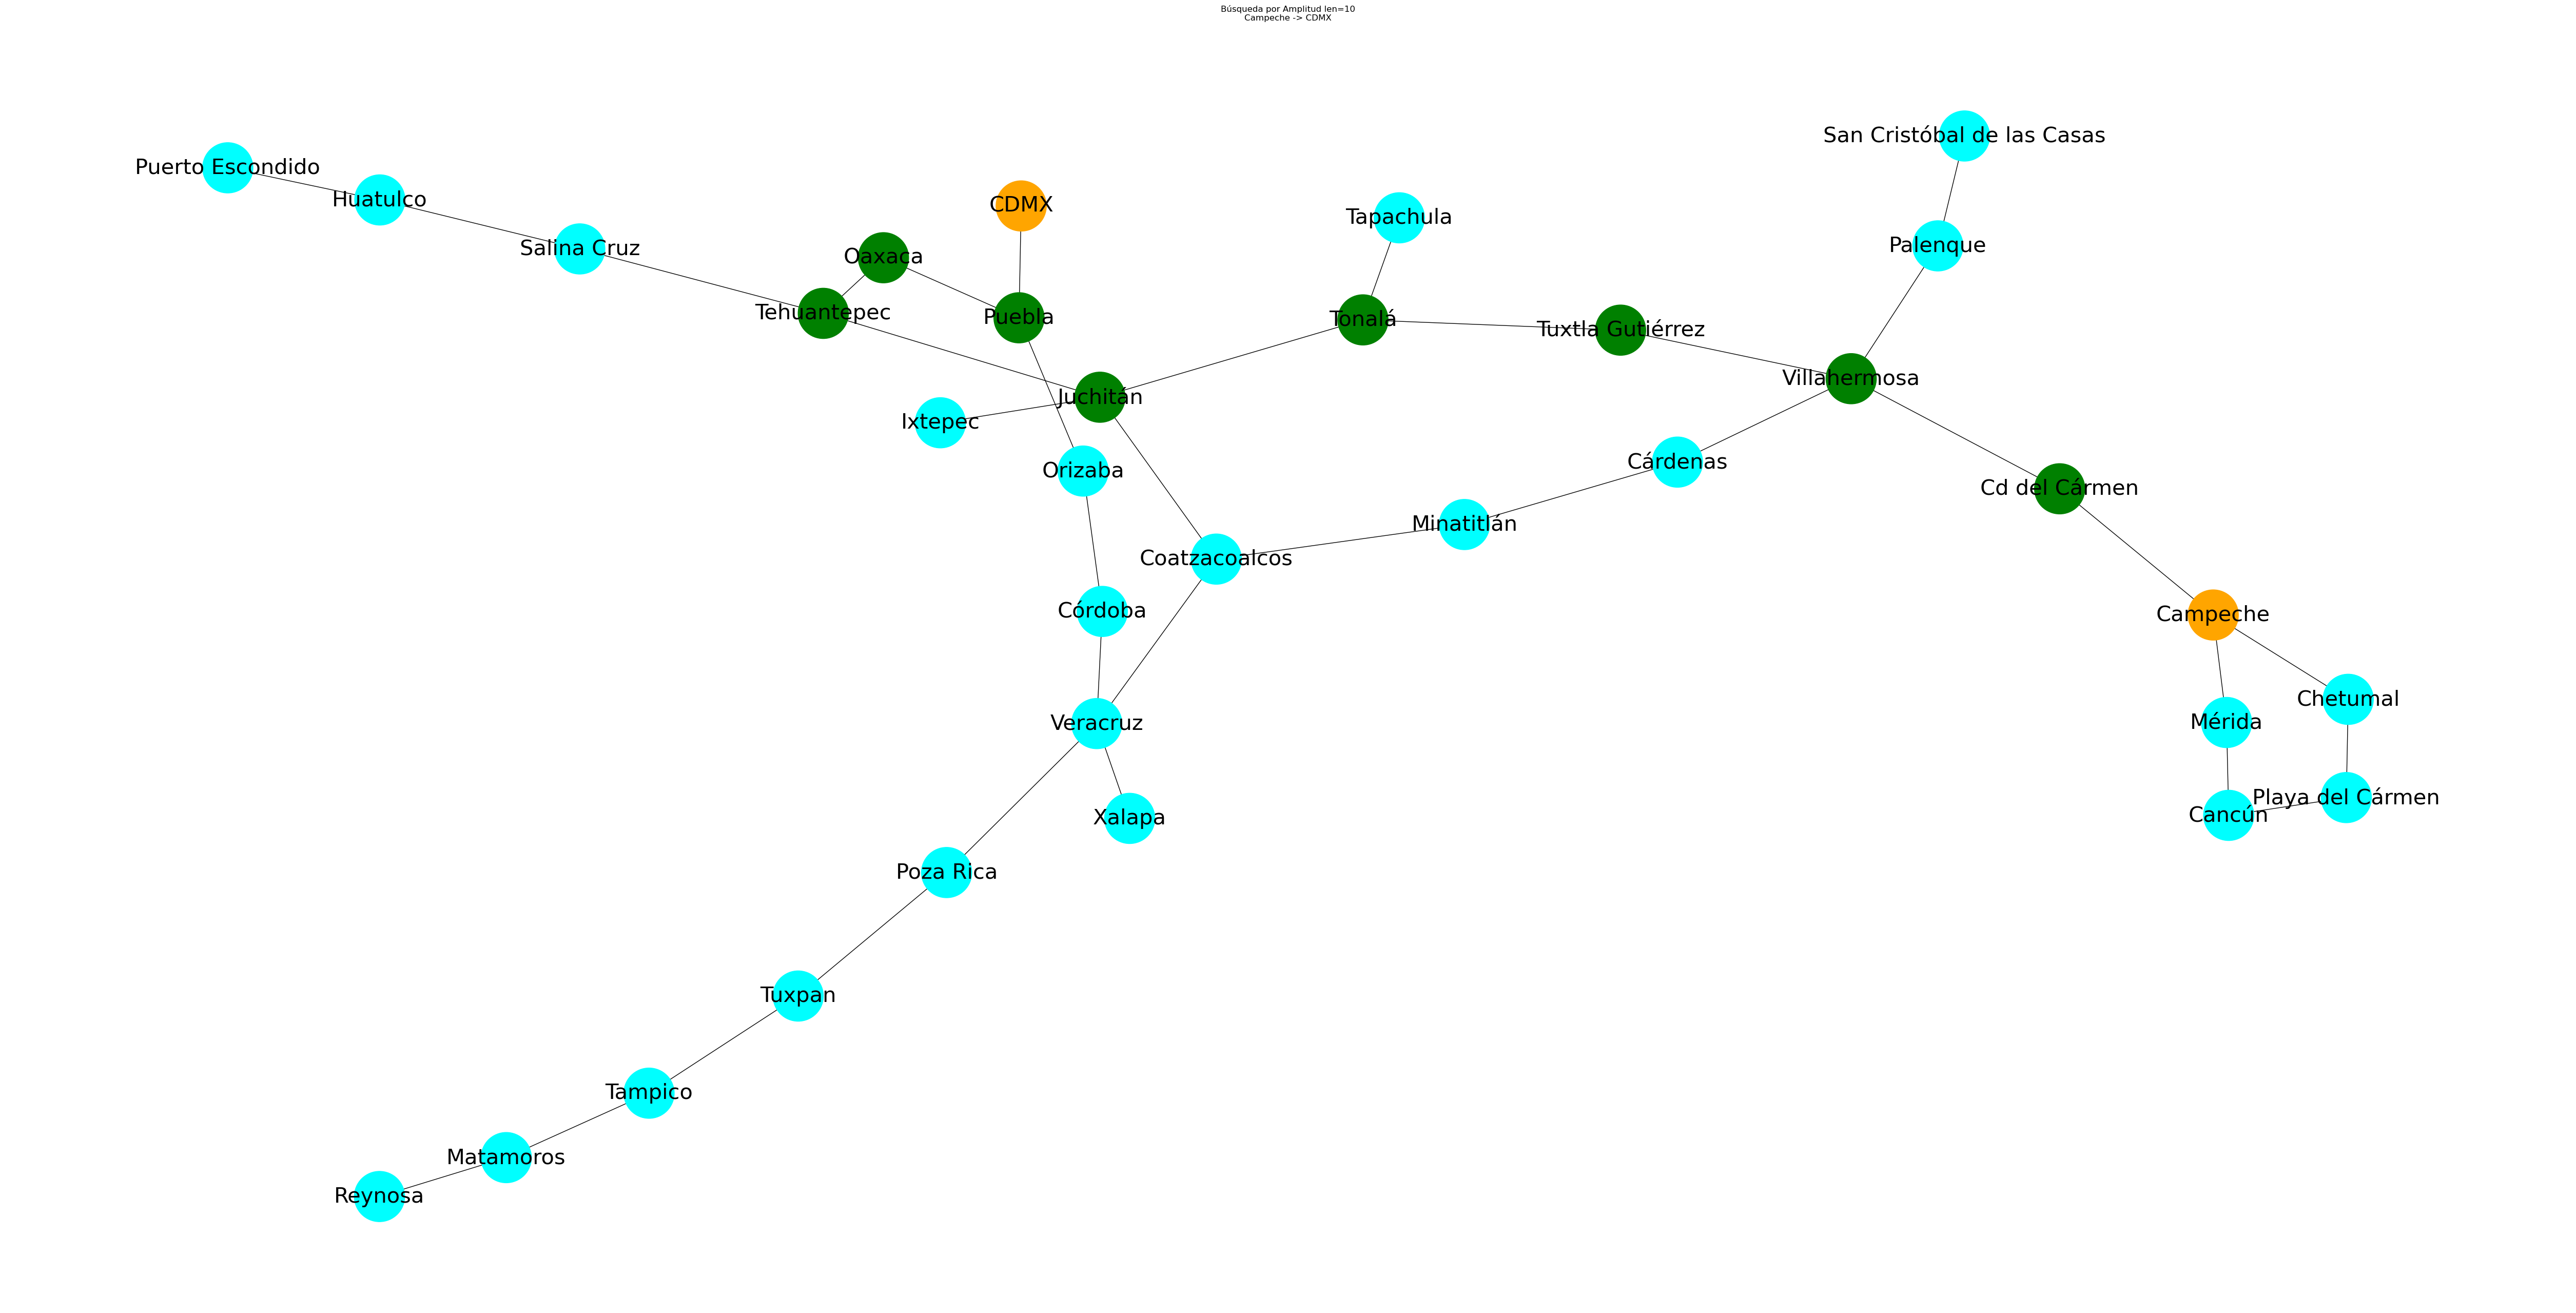

In [101]:
# INICIO
def main():
    # # Nodo de inicio y nodo objetivo
    # nodo_inicio = 'Reynosa'
    # nodo_objetivo = 'Playa del Cármen'
    nodo_inicio = input("Ingrese la ciudad de inicio: ")
    nodo_objetivo = input("Ingrese la ciudad final: ")

    busqueda(grafo, nodo_inicio, nodo_objetivo, imprimir=False)

main()

Cada lagoritmo tiene sus ventajas y desventajas. En algunos casos el DFS encuentra una solución en considerables menos iteraciones que el BFS, pero posiblemente es de menor calidad. Dependería de las necesidades de cada programa en que la búsqueda se utilice, pero creo yo que en general más vale errar en BFS para evitar muchos caminos profundos que podrían hacer perder tiempo en DFS.